In [3]:
import pygsheets
import pandas as pd


# 連接到 Google Sheets
gc = pygsheets.authorize(service_file='deep-cascade-425708-t5-bfff383647bd.json')

# 打開指定的 Google Sheets 文件
sh = gc.open_by_url('https://docs.google.com/spreadsheets/d/1HEKz3_iiSTeA6xd6mAbeJD0WrXYT8AYl5b0K38c-BYk/edit?gid=0#gid=0')

# 選擇工作表
wks = sh[0]

# 讀取分詞數據
df = wks.get_as_df()

# 關鍵詞分析
分析爬取到的標題、描述和內容中出現的關鍵詞，了解哪些詞語與心理諮商有關，哪些詞語可能是用戶常搜索的關鍵詞。



諮商     260
心理     226
服務      76
心理師     46
健康      41
新       38
關於      37
我們      35
專區      33
預約      33
資訊      30
專業      28
中心      28
消息      26
分享      26
治療師     25
介紹      25
會員      24
最       24
台北      24
Name: count, dtype: int64


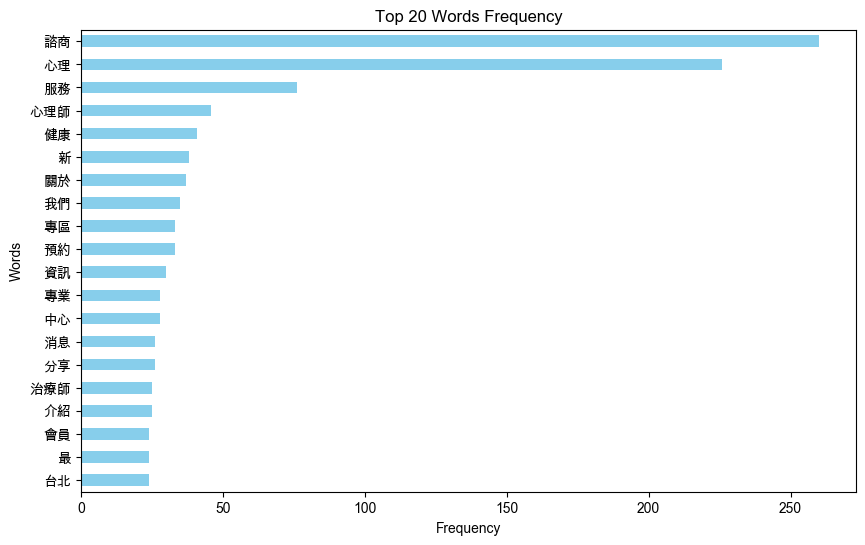

In [16]:
import matplotlib.pyplot as plt

# 建立停用詞列表
stop_words = ['?', ',', ')', '(', '/', '與', '的', '，', '？', '、', '-']

# 合併分詞列
all_words = []
for column in ['segmented_title', 'segmented_meta', 'segmented_content']:
    all_words.extend(df[column].str.split().tolist())

# 刪除停用詞
all_words_cleaned = [[word for word in sublist if word not in stop_words] for sublist in all_words]

# 展平列表
all_words_flat = [word for sublist in all_words_cleaned for word in sublist]

# 計算詞頻
word_freq = pd.Series(all_words_flat).value_counts()

# 選擇前20個最常見的詞
top_20_words = word_freq.head(20)

print(top_20_words)

# 指定中文字體
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

# 繪製水平長條圖
plt.figure(figsize=(10, 6))
top_20_words.plot(kind='barh', color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 Words Frequency')
plt.gca().invert_yaxis()  # 讓詞頻最高的詞顯示在圖的上方
plt.show()



# 相關性分析
評估爬取到的標題、描述和內容與心理諮商主題的相關性，了解這些內容是否與心理諮商相關並且具有價值。



In [23]:
# 計算標題、meta和內容之間的相關性
# 將分詞結果轉換為詞袋表示
from sklearn.feature_extraction.text import CountVectorizer

# 將分詞結果合併為單個列表
all_segmented = df['segmented_title'] + df['segmented_meta'] + df['segmented_content']

# 初始化CountVectorizer
vectorizer = CountVectorizer()

# 將文本數據轉換為詞袋表示
X = vectorizer.fit_transform(all_segmented)

# 將稀疏矩陣轉換為DataFrame
df_vectorized = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# 計算相關性
correlation_matrix = df_vectorized.corr()

# 繪製熱力圖
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('標題、meta和內容之間的相關性')
plt.show()


# 排名分析：
記錄每個爬取到的頁面在搜索結果中的排名位置，分析排名位置與內容質量、關鍵詞匹配度等因素之間的關係。